# Creating & Analyzing Equity Portfolios (with rebalancing)

> __Our goal is to create an optimal portfolio, and re-balancing the weigths over time - for save to optimization over time.__

---

# Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
prices = pd.read_csv("stocks.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-03,35.875000,198.589996,107.459999,211.153839,92.750000,68.169998,23.507999,75.360001
2017-07-05,36.022499,201.809998,105.629997,210.384613,93.680000,69.080002,21.806000,75.320000
2017-07-06,35.682499,201.479996,103.349998,202.384613,93.379997,68.570000,20.588667,75.470001
2017-07-07,36.044998,202.369995,103.320000,201.153839,93.849998,69.459999,20.881332,75.330002
2017-07-10,36.264999,203.960007,103.589996,200.307693,93.190002,69.980003,21.070000,73.230003
...,...,...,...,...,...,...,...,...
2022-06-24,141.660004,141.529999,97.779999,67.080002,117.320000,267.700012,245.706665,123.720001
2022-06-27,141.660004,138.720001,96.610001,66.709999,116.379997,264.890015,244.919998,124.120003
2022-06-28,137.440002,138.699997,95.919998,65.879997,115.820000,256.480011,232.663330,122.370003


In [7]:
returns = prices.pct_change().dropna() 
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.004111,0.016214,-0.017030,-0.003643,0.010027,0.013349,-0.072401,-0.000531
2017-07-06,-0.009439,-0.001635,-0.021585,-0.038026,-0.003202,-0.007383,-0.055826,0.001992
2017-07-07,0.010159,0.004417,-0.000290,-0.006081,0.005033,0.012979,0.014215,-0.001855
2017-07-10,0.006104,0.007857,0.002613,-0.004206,-0.007032,0.007486,0.009035,-0.027877
2017-07-11,0.003240,0.011326,0.002413,0.013057,-0.003863,0.000143,0.035343,0.003277
...,...,...,...,...,...,...,...,...
2022-06-24,0.024517,0.056431,0.036903,0.046980,0.029846,0.034150,0.045249,0.000809
2022-06-27,0.000000,-0.019854,-0.011966,-0.005516,-0.008012,-0.010497,-0.003202,0.003233
2022-06-28,-0.029790,-0.000144,-0.007142,-0.012442,-0.004812,-0.031749,-0.050044,-0.014099


In [8]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-07-05 to 2022-06-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   GE      1257 non-null   float64
 4   JPM     1257 non-null   float64
 5   MSFT    1257 non-null   float64
 6   TSLA    1257 non-null   float64
 7   WMT     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


In [9]:
# Function that calculate the annualize risk & return
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [10]:
# Calculate the annualize risk & return of thoses instruments: 
summary = ann_risk_return(returns.iloc[1:])
summary

,ann. Risk,CAGR
AAPL,0.320853,0.306835
BA,0.495955,-0.075152
DIS,0.306920,-0.022299
GE,0.432135,-0.213220
JPM,0.312383,0.037617
MSFT,0.294255,0.301433
TSLA,0.636075,0.596477
WMT,0.231155,0.100836


---

# Creating Random Portfolios (Part 1)

In [57]:
# number of assets
noa = len(returns.columns) 
noa

8

In [58]:
# number of random portfolios
nop = 10000 
nop

10000

In [59]:
# 80,000 random floats between 0 and 1
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [60]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.42310646, 0.9807642 ,
        0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.84943179, 0.72445532,
        0.61102351],
       ...,
       [0.1412533 , 0.28570045, 0.56403074, ..., 0.34359409, 0.87588094,
        0.78291379],
       [0.1896295 , 0.45365639, 0.82695243, ..., 0.91009298, 0.92561585,
        0.38263481],
       [0.84641632, 0.3538014 , 0.67855546, ..., 0.40234825, 0.42038566,
        0.91972547]])

In [61]:
matrix.shape

# (10000, 8) -> 10000 portfolios. each portfolio have 8 weigths 
# (each weigth for each asset) 

(10000, 8)

In [62]:
matrix.sum(axis = 1, keepdims= True)
# We need to normalize (each portfolio weigths must sum to 1)

array([[4.56894411],
       [3.57956695],
       [4.24063404],
       ...,
       [3.82262761],
       [4.93698499],
       [3.99183794]])

In [63]:
# normalize (now each portfolio weigths will sum to 1)
weights = matrix / matrix.sum(axis = 1, keepdims= True) # make portfolio weights summing up to 1
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.03695189, 0.07473928, 0.14755053, ..., 0.08988427, 0.22913059,
        0.20481037],
       [0.03840998, 0.09188936, 0.16750151, ..., 0.18434186, 0.18748606,
        0.07750374],
       [0.21203674, 0.0886312 , 0.16998572, ..., 0.10079273, 0.10531131,
        0.2304015 ]])

In [64]:
# Senity check
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

__one Portfolio__

In [65]:
w1 = weights[0]
w1

array([0.15243548, 0.06262702, 0.04965074, 0.12066568, 0.15746942,
       0.09260487, 0.21465883, 0.14988797])

__Daily rebalancing of weights.__

In [66]:
returns.head(2)

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020


In [67]:
# weighted average simple returns over time
returns.mul(w1).sum(axis = 1) 

Date
2017-07-05   -0.0124
2017-07-06   -0.0201
2017-07-07    0.0058
2017-07-10   -0.0016
2017-07-11    0.0104
               ...  
2022-06-24    0.0325
2022-06-27   -0.0049
2022-06-28   -0.0230
2022-06-29   -0.0060
2022-06-30   -0.0133
Length: 1257, dtype: float64

In [68]:
port1 = returns.dot(w1) # dot product
port1

Date
2017-07-05   -0.0124
2017-07-06   -0.0201
2017-07-07    0.0058
2017-07-10   -0.0016
2017-07-11    0.0104
               ...  
2022-06-24    0.0325
2022-06-27   -0.0049
2022-06-28   -0.0230
2022-06-29   -0.0060
2022-06-30   -0.0133
Length: 1257, dtype: float64

-> __Active rebalancing__! __Weights restored__ to initial/target weights at the end of each day. <br>
-> selling daily winners and buying daily losers. (__Contrarian Trading Strategy__)


In [69]:
ann_risk_return(port1.to_frame())

,ann. Risk,CAGR
0,0.2739,0.2196


# Creating Random Portfolios - many Portfolios

In [70]:
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.03695189, 0.07473928, 0.14755053, ..., 0.08988427, 0.22913059,
        0.20481037],
       [0.03840998, 0.09188936, 0.16750151, ..., 0.18434186, 0.18748606,
        0.07750374],
       [0.21203674, 0.0886312 , 0.16998572, ..., 0.10079273, 0.10531131,
        0.2304015 ]])

In [71]:
port_ret= returns.dot(weights.T)
port_ret # weighted average simple returns for 10,000 portfolios

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-05,-0.0124,-0.0068,-0.0100,0.0018,-0.0115,-0.0064,-0.0012,-0.0070,-0.0019,0.0023,...,-0.0109,-0.0122,0.0009,-0.0068,-0.0234,-0.0103,-0.0015,-0.0173,-0.0106,-0.0072
2017-07-06,-0.0201,-0.0176,-0.0192,-0.0109,-0.0193,-0.0144,-0.0166,-0.0165,-0.0115,-0.0114,...,-0.0230,-0.0214,-0.0104,-0.0180,-0.0248,-0.0209,-0.0113,-0.0246,-0.0186,-0.0153
2017-07-07,0.0058,0.0026,0.0053,0.0057,0.0069,0.0042,0.0045,0.0045,0.0042,0.0033,...,0.0058,0.0057,0.0055,0.0053,0.0060,0.0053,0.0063,0.0035,0.0063,0.0044
2017-07-10,-0.0016,-0.0044,-0.0016,-0.0005,0.0010,-0.0058,-0.0002,-0.0011,-0.0038,-0.0039,...,0.0035,0.0009,-0.0006,0.0003,0.0006,0.0009,0.0005,-0.0027,0.0007,-0.0027
2017-07-11,0.0104,0.0087,0.0085,0.0044,0.0103,0.0065,0.0079,0.0079,0.0039,0.0067,...,0.0121,0.0109,0.0042,0.0060,0.0144,0.0115,0.0048,0.0127,0.0085,0.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.0325,0.0320,0.0331,0.0307,0.0350,0.0271,0.0369,0.0345,0.0259,0.0324,...,0.0405,0.0364,0.0346,0.0333,0.0353,0.0393,0.0314,0.0342,0.0357,0.0291
2022-06-27,-0.0049,-0.0053,-0.0064,-0.0064,-0.0070,-0.0040,-0.0074,-0.0076,-0.0047,-0.0063,...,-0.0075,-0.0074,-0.0092,-0.0066,-0.0061,-0.0078,-0.0073,-0.0055,-0.0080,-0.0050
2022-06-28,-0.0230,-0.0168,-0.0214,-0.0192,-0.0236,-0.0188,-0.0176,-0.0174,-0.0190,-0.0146,...,-0.0217,-0.0230,-0.0143,-0.0200,-0.0240,-0.0193,-0.0193,-0.0220,-0.0203,-0.0204


In [72]:
port_summary = ann_risk_return(port_ret)
port_summary

,ann. Risk,CAGR
0,0.2739,0.2196
1,0.2554,0.1067
2,0.2580,0.1864
3,0.2431,0.1619
4,0.2807,0.2369
...,...,...
9995,0.3049,0.1587
9996,0.2478,0.1879
9997,0.2761,0.1661
9998,0.2740,0.1974


In [73]:
summary

,ann. Risk,CAGR,RaR
AAPL,0.3209,0.3068,0.9563
BA,0.4960,-0.0752,-0.1515
DIS,0.3069,-0.0223,-0.0727
GE,0.4321,-0.2132,-0.4934
JPM,0.3124,0.0376,0.1204
MSFT,0.2943,0.3014,1.0244
TSLA,0.6361,0.5965,0.9377
WMT,0.2312,0.1008,0.4362


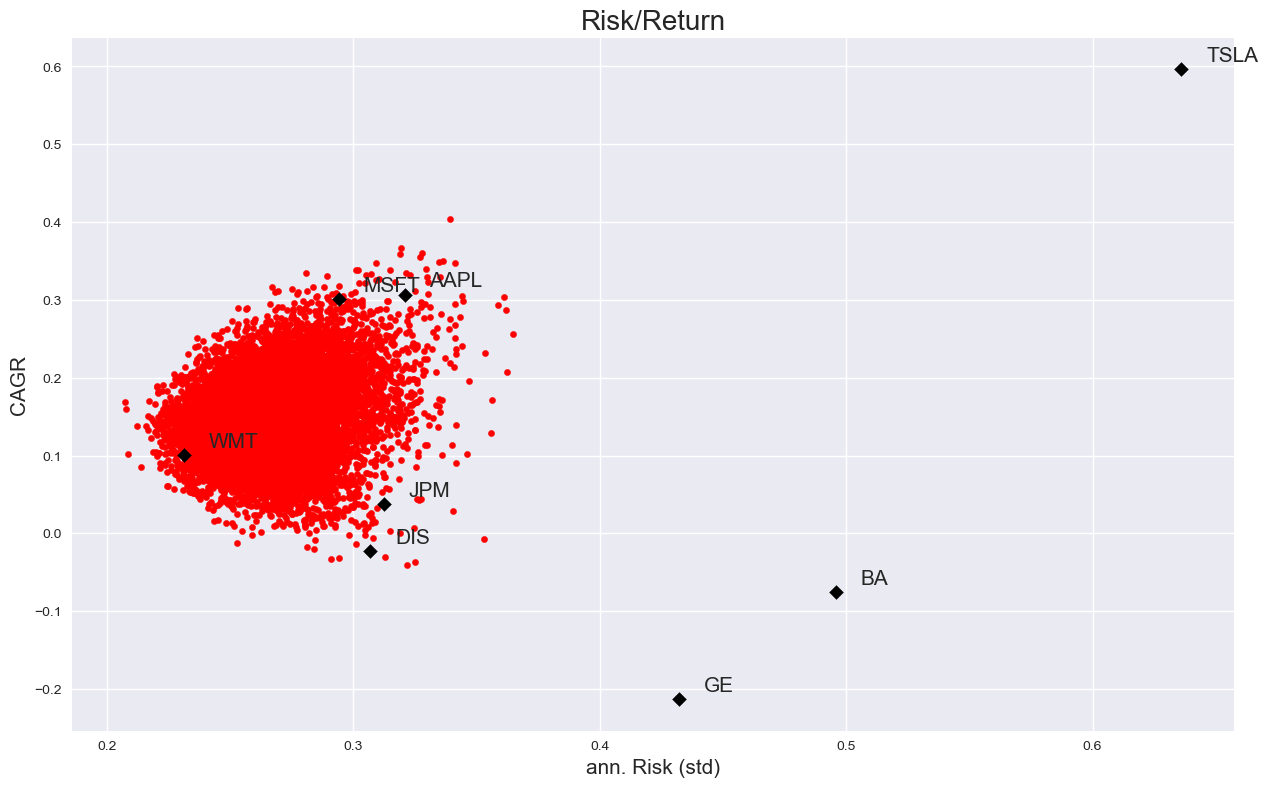

In [74]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"],s= 20, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 50, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

---

# Performance Measurement: Risk-adjusted Return

__Risk-adjusted-Return (RaR): CAGR per unit of Risk. (similar to Sharpe Ratio)__

In [75]:
summary["RaR"] = summary["CAGR"].div(summary["ann. Risk"])
summary

,ann. Risk,CAGR,RaR
AAPL,0.3209,0.3068,0.9563
BA,0.4960,-0.0752,-0.1515
DIS,0.3069,-0.0223,-0.0727
GE,0.4321,-0.2132,-0.4934
JPM,0.3124,0.0376,0.1204
MSFT,0.2943,0.3014,1.0244
TSLA,0.6361,0.5965,0.9377
WMT,0.2312,0.1008,0.4362


In [76]:
port_summary["RaR"] = port_summary["CAGR"].div(port_summary["ann. Risk"])

In [77]:
port_summary.sort_values("RaR")

,ann. Risk,CAGR,RaR
2269,0.3217,-0.0401,-0.1247
9367,0.3249,-0.0371,-0.1142
559,0.2908,-0.0325,-0.1116
4231,0.2943,-0.0312,-0.1061
664,0.3128,-0.0302,-0.0964
...,...,...,...
6822,0.2681,0.3099,1.1562
1741,0.2696,0.3120,1.1573
3054,0.2671,0.3162,1.1838
8228,0.3392,0.4034,1.1894


In [78]:
vmin = port_summary.RaR.min()
vmin

-0.12474306232913128

In [79]:
vmax = port_summary.RaR.max()
vmax

1.1938729489467585

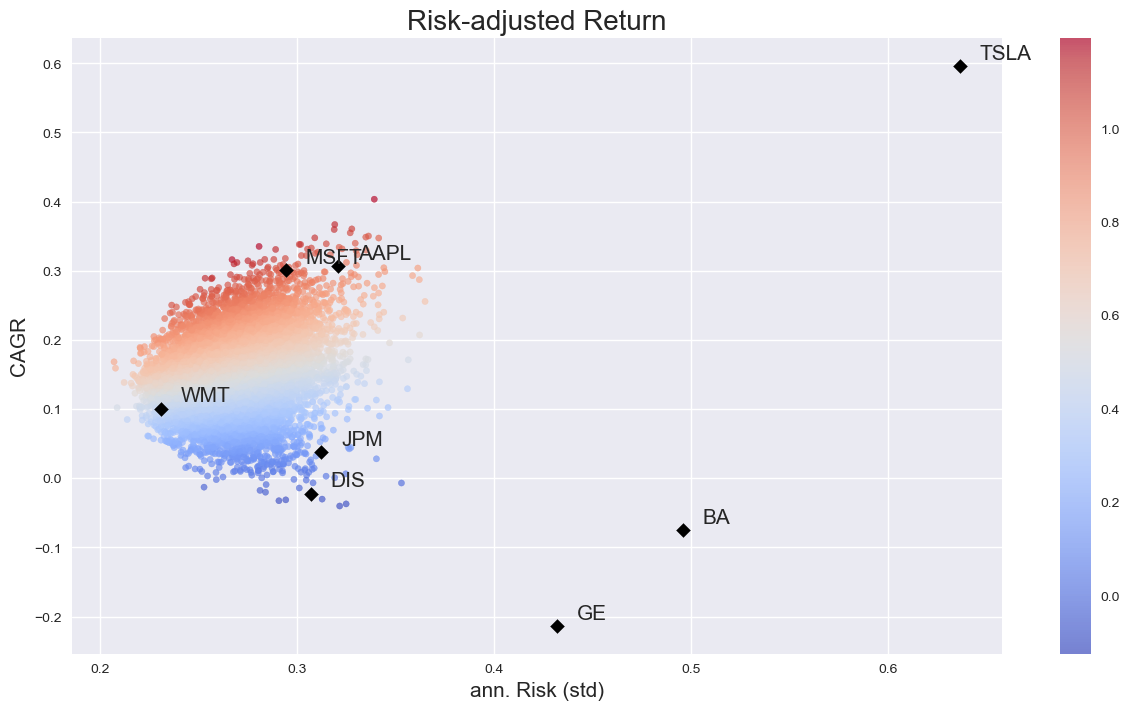

In [80]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-adjusted Return", fontsize = 20)
plt.show()

---

# Portfolio Optimization

__Note: We are optimizing the past here (backward looking)!__

In [81]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

In [82]:
returns 

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [83]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.dot(weights.T)
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr

In [84]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.dot(weights.T)
    return simple_ret.std() * np.sqrt(252)

In [85]:
#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize RaR == minimize RaR * (-1)
def min_func_RaR(weights): 
     return -(port_ret(weights)) / port_vol(weights) #Risk-adjusted Return * (-1)

In [86]:
#number of assets
noa = len(returns.columns)
noa

8

In [87]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [88]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [89]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [90]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(min_func_RaR, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [91]:
#output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.290228328607146
       x: [ 2.114e-01  0.000e+00  1.423e-16  7.902e-16  0.000e+00
            3.920e-01  2.521e-01  1.445e-01]
     nit: 9
     jac: [-1.097e-02  1.062e+00  7.306e-01  1.528e+00  4.257e-01
           -1.200e-02 -1.193e-02 -1.137e-02]
    nfev: 84
    njev: 9

In [92]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.21141758, 0.        , 0.        , 0.        , 0.        ,
       0.3919723 , 0.25213035, 0.14447978])

In [93]:
pd.Series(data = optimal_weights, index = returns.columns).sort_values(ascending = False).head(20)

MSFT   0.3920
TSLA   0.2521
AAPL   0.2114
WMT    0.1445
GE     0.0000
DIS    0.0000
BA     0.0000
JPM    0.0000
dtype: float64

-> __Optimization (without bounds) does not necessarily lead to practical/factual diversification.__

In [94]:
#cagr of the optimal portfolio
cagr_opt = port_ret(optimal_weights)
cagr_opt

0.38603963232210536

In [95]:
#volatility of the optimal portfolio
vol_opt = port_vol(optimal_weights)
vol_opt

0.29920257039996234

In [96]:
#RaR of the optimal portfolio
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

1.290228328607146

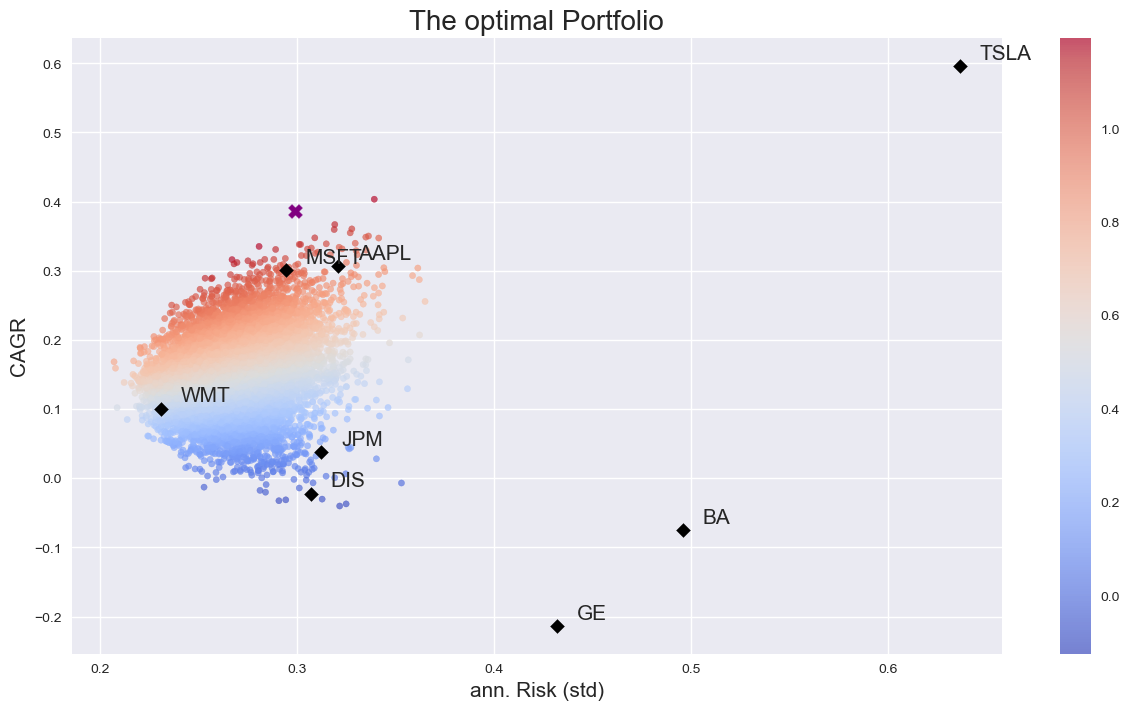

In [97]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.scatter(x = vol_opt, y = cagr_opt, s = 100, marker = "X", c = "purple") # best Portfolio
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The optimal Portfolio", fontsize = 20)
plt.show()

__Reminder: We are optimizing the past here (backward looking).__ <br>
-> Very unlikely we had selected this optimal portfolio back in 2017 (__look ahead bias__)! <br>
-> Very unlikely this will be the optimal portfolio in the future (__past performance is not a good indicator for future performance__)!

## Minimum Variance Portfolio

(use code above with following replacements:)

In [98]:
# Minimum Variance Portfolio
opts = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

## Maximum Return Portfolio

(use code above with following replacements:)

In [99]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.dot(weights.T)
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr * (-1)

In [100]:
# Maximum Return Portfolio
opts = sco.minimize(port_ret, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

In [101]:
#cagr of the optimal portfolio
cagr_opt = -port_ret(optimal_weights)
cagr_opt

0.38603963232210536

---

## The Efficient Frontier

__Idea: Find for each return level the portfolio with the lowest volatility.__

In [102]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [103]:
summary

,ann. Risk,CAGR,RaR
AAPL,0.3209,0.3068,0.9563
BA,0.4960,-0.0752,-0.1515
DIS,0.3069,-0.0223,-0.0727
GE,0.4321,-0.2132,-0.4934
JPM,0.3124,0.0376,0.1204
MSFT,0.2943,0.3014,1.0244
TSLA,0.6361,0.5965,0.9377
WMT,0.2312,0.1008,0.4362


In [104]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.dot(weights.T).iloc[1:]
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr

In [105]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.dot(weights.T).iloc[1:]
    return simple_ret.std() * np.sqrt(252)

In [106]:
noa = len(returns.columns)
noa

8

In [107]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [108]:
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 100)
tcagrs # evenly spaced target returns between min and max

array([-0.21321957, -0.20504081, -0.19686206, -0.18868331, -0.18050455,
       -0.1723258 , -0.16414704, -0.15596829, -0.14778953, -0.13961078,
       -0.13143202, -0.12325327, -0.11507451, -0.10689576, -0.098717  ,
       -0.09053825, -0.08235949, -0.07418074, -0.06600198, -0.05782323,
       -0.04964447, -0.04146572, -0.03328696, -0.02510821, -0.01692945,
       -0.0087507 , -0.00057194,  0.00760681,  0.01578557,  0.02396432,
        0.03214308,  0.04032183,  0.04850058,  0.05667934,  0.06485809,
        0.07303685,  0.0812156 ,  0.08939436,  0.09757311,  0.10575187,
        0.11393062,  0.12210938,  0.13028813,  0.13846689,  0.14664564,
        0.1548244 ,  0.16300315,  0.17118191,  0.17936066,  0.18753942,
        0.19571817,  0.20389693,  0.21207568,  0.22025444,  0.22843319,
        0.23661195,  0.2447907 ,  0.25296946,  0.26114821,  0.26932697,
        0.27750572,  0.28568448,  0.29386323,  0.30204198,  0.31022074,
        0.31839949,  0.32657825,  0.334757  ,  0.34293576,  0.35

In [109]:
# portfolio return == tcagr
cons = ({"type": "eq", "fun": lambda x: port_ret(x) - tcagr},
       {"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [110]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [111]:
vols = []

In [112]:
#for each target return, find the portfolio with the lowest volatility
for tcagr in tcagrs:
    res = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds = bnds, constraints = cons)
    vols.append(res["fun"])
vols = np.array(vols)

In [113]:
vols

array([0.43213508, 0.42197579, 0.41195562, 0.40209141, 0.39240265,
       0.38291184, 0.37364514, 0.3645387 , 0.35550815, 0.34656013,
       0.33770132, 0.32893982, 0.32028487, 0.31174704, 0.30333841,
       0.2950727 , 0.28696553, 0.27903465, 0.27130013, 0.26378465,
       0.25651377, 0.24951616, 0.24282382, 0.23647227, 0.23050067,
       0.2249521 , 0.21987192, 0.21531102, 0.21131839, 0.20794993,
       0.20522318, 0.20302138, 0.20135241, 0.20020337, 0.19930996,
       0.19861154, 0.19809443, 0.19775684, 0.19759791, 0.19761702,
       0.1977934 , 0.19810356, 0.19854475, 0.19911542, 0.1998155 ,
       0.20067366, 0.20169919, 0.20288559, 0.20423363, 0.20573757,
       0.2073929 , 0.20920609, 0.21114043, 0.21322339, 0.21544195,
       0.21783341, 0.2204043 , 0.22314838, 0.22606022, 0.22913398,
       0.23238454, 0.23587698, 0.23960945, 0.24357489, 0.24776709,
       0.25217883, 0.25680376, 0.26163527, 0.26666782, 0.27189614,
       0.27731383, 0.28291674, 0.28870056, 0.29466057, 0.30079

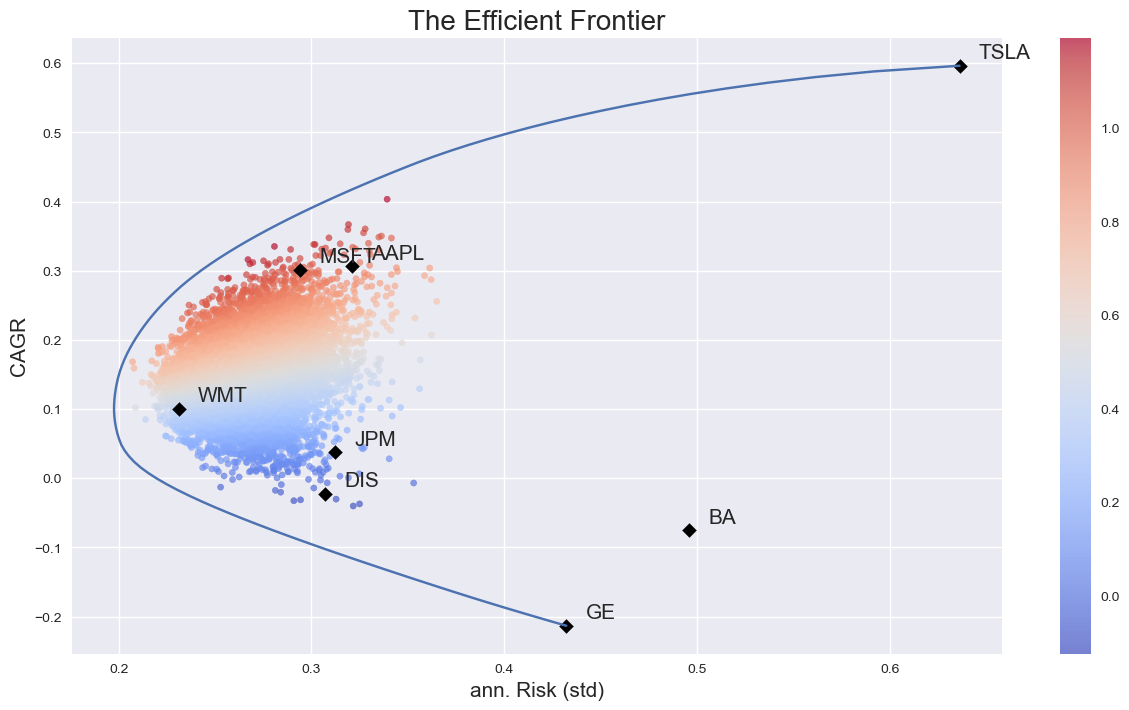

In [114]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs) # efficient frontier
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()

---

# __Comparison: daily Rebalancing vs. no Rebalancing__

__Efficient Frontier without rebalancing:__

In [115]:
cagr_no = np.array([-0.21321957, -0.20504081, -0.19686206, -0.18868331, -0.18050455,
       -0.1723258 , -0.16414704, -0.15596829, -0.14778953, -0.13961078,
       -0.13143202, -0.12325327, -0.11507451, -0.10689576, -0.098717  ,
       -0.09053825, -0.08235949, -0.07418074, -0.06600198, -0.05782323,
       -0.04964447, -0.04146572, -0.03328696, -0.02510821, -0.01692945,
       -0.0087507 , -0.00057194,  0.00760681,  0.01578557,  0.02396432,
        0.03214308,  0.04032183,  0.04850058,  0.05667934,  0.06485809,
        0.07303685,  0.0812156 ,  0.08939436,  0.09757311,  0.10575187,
        0.11393062,  0.12210938,  0.13028813,  0.13846689,  0.14664564,
        0.1548244 ,  0.16300315,  0.17118191,  0.17936066,  0.18753942,
        0.19571817,  0.20389693,  0.21207568,  0.22025444,  0.22843319,
        0.23661195,  0.2447907 ,  0.25296946,  0.26114821,  0.26932697,
        0.27750572,  0.28568448,  0.29386323,  0.30204198,  0.31022074,
        0.31839949,  0.32657825,  0.334757  ,  0.34293576,  0.35111451,
        0.35929327,  0.36747202,  0.37565078,  0.38382953,  0.39200829,
        0.40018704,  0.4083658 ,  0.41654455,  0.42472331,  0.43290206,
        0.44108082,  0.44925957,  0.45743833,  0.46561708,  0.47379584,
        0.48197459,  0.49015335,  0.4983321 ,  0.50651086,  0.51468961,
        0.52286837,  0.53104712,  0.53922587,  0.54740463,  0.55558338,
        0.56376214,  0.57194089,  0.58011965,  0.5882984 ,  0.59647716])

In [116]:
vols_no = np.array([0.43230733, 0.4082562 , 0.38776821, 0.36971057, 0.35298005,
       0.33746244, 0.32307554, 0.30974812, 0.29741952, 0.28603623,
       0.27555009, 0.26591947, 0.25710661, 0.2490747 , 0.24178985,
       0.23521878, 0.22932929, 0.22408966, 0.2194684 , 0.21543409,
       0.2119554 , 0.20898808, 0.2064256 , 0.20423296, 0.20239196,
       0.20088063, 0.19967245, 0.19867169, 0.19785033, 0.19719909,
       0.19670841, 0.19636225, 0.19615204, 0.19607055, 0.19611186,
       0.19626816, 0.19653368, 0.19690195, 0.19736735, 0.19792419,
       0.19867678, 0.19968965, 0.20093869, 0.20241949, 0.20410759,
       0.20598642, 0.20804255, 0.21026158, 0.2126309 , 0.21513937,
       0.21779366, 0.22060839, 0.22356945, 0.22680792, 0.23038234,
       0.23426203, 0.23842321, 0.24284222, 0.2474965 , 0.25236585,
       0.25743184, 0.2626779 , 0.26808938, 0.273651  , 0.27935259,
       0.28518299, 0.29113258, 0.29719306, 0.30335721, 0.30961907,
       0.31597335, 0.32252773, 0.32942379, 0.33662063, 0.34408425,
       0.3517883 , 0.35971312, 0.36784493, 0.37617501, 0.3846992 ,
       0.39341798, 0.40233485, 0.41145694, 0.42079451, 0.4303609 ,
       0.44017233, 0.45024792, 0.46060983, 0.47132985, 0.48248702,
       0.4941349 , 0.50633574, 0.51916219, 0.53269957, 0.54704879,
       0.56233037, 0.57869002, 0.59630658, 0.61540303, 0.63626358])

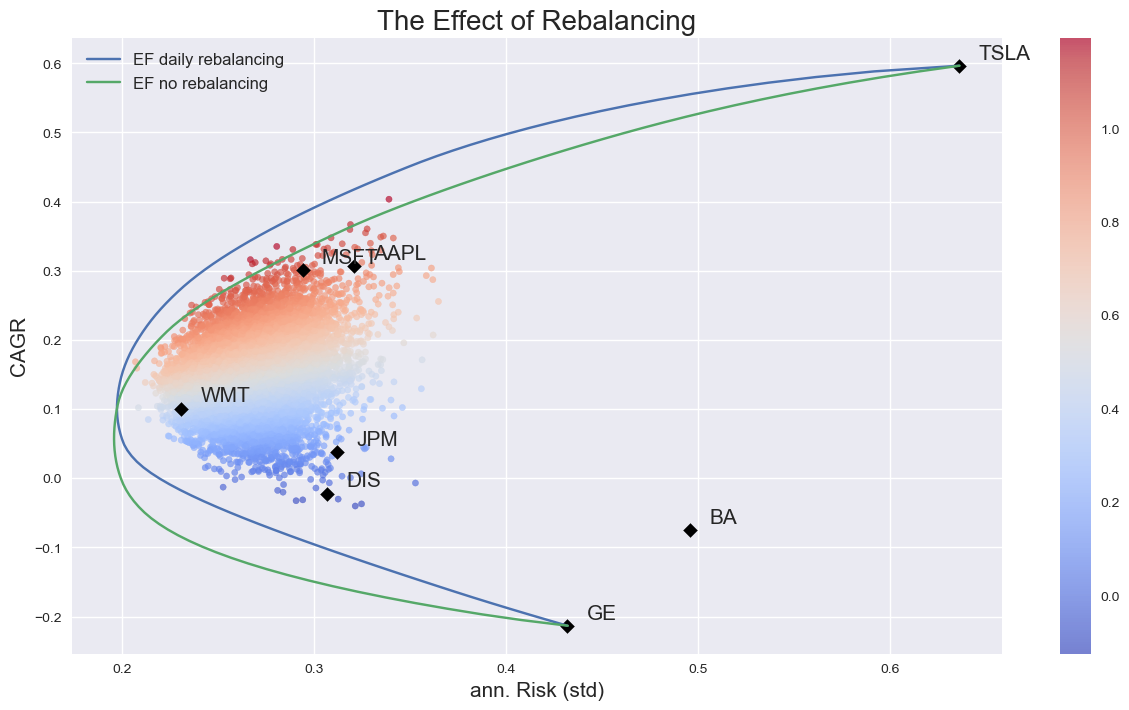

In [117]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs, label = "EF daily rebalancing") # efficient frontier with rebal.
plt.plot(vols_no, cagr_no, label = "EF no rebalancing") # efficient frontier without rebal.
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("The Effect of Rebalancing", fontsize = 20)
plt.show()

__Upward Shift__ of Efficient Frontier:
- equal risk & more return or
- equal return & less risk

Two general effects of rebalancing: <br>
- maintain __higher degree of diversification__ / restoring weights (always positive)
- __contrarian trading__ / sell winners buy losers (can be positive or negative)

---

# Approximation of Rebalancing Costs

Can we really benefit from (daily) Rebalancing? <br>
Yes, but only if:
- __small changes__ in portfolio weights are possible (large portfolio or fractional trading)
- __Rebalancing Costs are lower__ than Rebalancing Benefits

In [118]:
w1 # target weights to be reinstated at the end of each day 

array([0.15243548, 0.06262702, 0.04965074, 0.12066568, 0.15746942,
       0.09260487, 0.21465883, 0.14988797])

In [119]:
returns

,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2017-07-05,0.0041,0.0162,-0.0170,-0.0036,0.0100,0.0133,-0.0724,-0.0005
2017-07-06,-0.0094,-0.0016,-0.0216,-0.0380,-0.0032,-0.0074,-0.0558,0.0020
2017-07-07,0.0102,0.0044,-0.0003,-0.0061,0.0050,0.0130,0.0142,-0.0019
2017-07-10,0.0061,0.0079,0.0026,-0.0042,-0.0070,0.0075,0.0090,-0.0279
2017-07-11,0.0032,0.0113,0.0024,0.0131,-0.0039,0.0001,0.0353,0.0033
...,...,...,...,...,...,...,...,...
2022-06-24,0.0245,0.0564,0.0369,0.0470,0.0298,0.0341,0.0452,0.0008
2022-06-27,0.0000,-0.0199,-0.0120,-0.0055,-0.0080,-0.0105,-0.0032,0.0032
2022-06-28,-0.0298,-0.0001,-0.0071,-0.0124,-0.0048,-0.0317,-0.0500,-0.0141


In [120]:
matrix = returns.add(1).mul(w1).values
matrix

array([[0.15306221, 0.06364247, 0.04880521, ..., 0.09384105, 0.19911734,
        0.14980841],
       [0.15099671, 0.06252461, 0.04857904, ..., 0.09192119, 0.20267537,
        0.15018647],
       [0.15398407, 0.06290366, 0.04963633, ..., 0.09380682, 0.21771018,
        0.14960992],
       ...,
       [0.14789448, 0.06261798, 0.04929613, ..., 0.08966475, 0.20391654,
        0.14777466],
       [0.15442077, 0.06251413, 0.04951098, ..., 0.09396968, 0.21080846,
        0.14933677],
       [0.14968742, 0.06184446, 0.04900188, ..., 0.09138441, 0.21088529,
        0.14946998]])

In [121]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

weights # weights at the end of each day (before rebalancing)

array([[0.15499168, 0.06444473, 0.04942043, ..., 0.09502399, 0.20162737,
        0.15169686],
       [0.15408994, 0.06380545, 0.0495742 , ..., 0.09380423, 0.20682726,
        0.1532631 ],
       [0.15308929, 0.06253813, 0.0493479 , ..., 0.09326172, 0.21644509,
        0.14874055],
       ...,
       [0.15136984, 0.06408944, 0.05045453, ..., 0.09177177, 0.20870835,
        0.1512472 ],
       [0.15535637, 0.06289289, 0.04981096, ..., 0.09453902, 0.2120857 ,
        0.15024157],
       [0.15170559, 0.06267828, 0.04966255, ..., 0.0926165 , 0.21372856,
        0.15148521]])

In [122]:
weights.shape

(1257, 8)

In [123]:
weights.sum(axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [124]:
delta_weights = weights - w1
delta_weights

array([[ 0.0025562 ,  0.00181772, -0.00023031, ...,  0.00241912,
        -0.01303146,  0.00180889],
       [ 0.00165446,  0.00117843, -0.00007654, ...,  0.00119936,
        -0.00783157,  0.00337514],
       [ 0.00065381, -0.00008888, -0.00030284, ...,  0.00065686,
         0.00178626, -0.00114741],
       ...,
       [-0.00106564,  0.00146242,  0.00080379, ..., -0.00083309,
        -0.00595048,  0.00135923],
       [ 0.00292089,  0.00026588,  0.00016022, ...,  0.00193415,
        -0.00257313,  0.0003536 ],
       [-0.00072989,  0.00005127,  0.00001181, ...,  0.00001163,
        -0.00093027,  0.00159725]])

In [125]:
np.abs(delta_weights)

array([[0.0025562 , 0.00181772, 0.00023031, ..., 0.00241912, 0.01303146,
        0.00180889],
       [0.00165446, 0.00117843, 0.00007654, ..., 0.00119936, 0.00783157,
        0.00337514],
       [0.00065381, 0.00008888, 0.00030284, ..., 0.00065686, 0.00178626,
        0.00114741],
       ...,
       [0.00106564, 0.00146242, 0.00080379, ..., 0.00083309, 0.00595048,
        0.00135923],
       [0.00292089, 0.00026588, 0.00016022, ..., 0.00193415, 0.00257313,
        0.0003536 ],
       [0.00072989, 0.00005127, 0.00001181, ..., 0.00001163, 0.00093027,
        0.00159725]])

In [126]:
df = pd.DataFrame(np.abs(delta_weights))
df # deviation of weights

,0,1,2,3,4,5,6,7
0,0.0026,0.0018,0.0002,0.0011,0.0036,0.0024,0.0130,0.0018
1,0.0017,0.0012,0.0001,0.0022,0.0027,0.0012,0.0078,0.0034
2,0.0007,0.0001,0.0003,0.0014,0.0001,0.0007,0.0018,0.0011
3,0.0012,0.0006,0.0002,0.0003,0.0009,0.0008,0.0023,0.0039
4,0.0011,0.0001,0.0004,0.0003,0.0022,0.0009,0.0053,0.0011
...,...,...,...,...,...,...,...,...
1252,0.0012,0.0015,0.0002,0.0017,0.0004,0.0002,0.0027,0.0046
1253,0.0008,0.0009,0.0004,0.0001,0.0005,0.0005,0.0004,0.0012
1254,0.0011,0.0015,0.0008,0.0013,0.0029,0.0008,0.0060,0.0014
1255,0.0029,0.0003,0.0002,0.0033,0.0002,0.0019,0.0026,0.0004


In [127]:
# 
daily_rebal = df.sum(axis = 1).mean()
daily_rebal

0.0135629820831283

__-> on average, approx. 1.5% of total portfolio needs to be rebalanced every day (fractional trading).__

In [128]:
# price trading cost 
ptc = 0.01 # worst case for US Stocks
ptc

0.01

In [129]:
# For rebalancing the weigths each day, the cost is: 
daily_ptc = daily_rebal * ptc
daily_ptc

0.000135629820831283

In [130]:
port1

Date
2017-07-05   -0.0124
2017-07-06   -0.0201
2017-07-07    0.0058
2017-07-10   -0.0016
2017-07-11    0.0104
               ...  
2022-06-24    0.0325
2022-06-27   -0.0049
2022-06-28   -0.0230
2022-06-29   -0.0060
2022-06-30   -0.0133
Length: 1257, dtype: float64

In [131]:
port1_ac = port1 - daily_ptc
port1_ac

Date
2017-07-05   -0.0126
2017-07-06   -0.0202
2017-07-07    0.0057
2017-07-10   -0.0017
2017-07-11    0.0102
               ...  
2022-06-24    0.0323
2022-06-27   -0.0051
2022-06-28   -0.0231
2022-06-29   -0.0062
2022-06-30   -0.0134
Length: 1257, dtype: float64

In [132]:
ann_risk_return(port1.to_frame())

,ann. Risk,CAGR
0,0.2739,0.2196


In [133]:
ann_risk_return(port1_ac.to_frame())

,ann. Risk,CAGR
0,0.2739,0.1786


-> __Significant Rebalancing Costs__ eat up Rebalancing Benefits <br>
-> Solution: Reduce Rebalacing __Frequency to monthly/quarterly__ (reduces costs but also benefits)